## IMPORT LIBRARY

Import the required libraries such as the numpy library, matplotlib, sklearn and others.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD
from imblearn.over_sampling import SMOTE

## IMPORT DATASET

Calling the dataset in csv format and stored in the "df_train" variable then displaying the top 5 data using the .head() syntax



In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Kaggle/Competition House Prices/train.csv")
# df_test = pd.read_csv("/content/drive/MyDrive/Kaggle/Competition House Prices/test.csv")
# df_train =df_train_train.append(df_test)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis (EDA)

In the early stages of EDA, the first thing to do is look at the information from the dataset using the info() syntax. By using this syntax we can see the amount of data in each column and the data type. Because this dataset aims to predict whether the company will go bankrupt or not, the data needed is data in int and float format. from this dataset it can also be seen that there are 95 features and 1 target. After that other information can be seen using the syntax describe(). With this syntax we can see the average value and standard deviation of the dataset.

In [ ]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
df_train = df_train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [4]:
import pandas

In [5]:
df_train[df_train.select_dtypes(['object']).columns]= df_train[df_train.select_dtypes(['object']).columns].apply(lambda x: pandas.factorize(x)[0])

In [6]:
nan = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
df_train[nan].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [7]:
df_train = df_train.drop('Id', axis=1).reset_index(drop=True)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,1,0,0,2,0,...,272,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,1,0,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125


In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#     Fill missing values using k-Nearest Neighbors
num_cols=df_train.describe().columns.tolist()
imp = KNNImputer(n_neighbors=10, weights="uniform")
df_train=pd.DataFrame(imp.fit_transform(df_train), columns=df_train.columns)
# df_train[num_cols]=np.log(df_train[num_cols]+1)

# #     scaling data for NN
# scaler = StandardScaler()

# scaledf_train = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# for col in num_cols:
#     df[col] = scaledf_train[col]

In [11]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,0.0,4.189655,9.042040,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392,0.0,0.000000,12.247699
1,3.044522,0.0,4.394449,9.169623,0.0,0.000000,0.0,0.0,0.693147,0.0,...,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894,0.0,0.000000,12.109016
2,4.110874,0.0,4.234107,9.328212,0.0,0.693147,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392,0.0,0.000000,12.317171
3,4.262680,0.0,4.110874,9.164401,0.0,0.693147,0.0,0.0,1.098612,0.0,...,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396,0.0,0.693147,11.849405
4,4.110874,0.0,4.442651,9.565284,0.0,0.693147,0.0,0.0,0.693147,0.0,...,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392,0.0,0.000000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,0.0,4.143135,8.976894,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894,0.0,0.000000,12.072547
1456,3.044522,0.0,4.454347,9.486152,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.606387,0.0,0.000000,12.254868
1457,4.262680,0.0,4.204693,9.109746,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,7.824446,1.791759,7.606387,0.0,0.000000,12.493133
1458,3.044522,0.0,4.234107,9.181735,0.0,0.000000,0.0,0.0,0.000000,0.0,...,4.727388,0.0,0.0,0.0,0.000000,1.609438,7.606387,0.0,0.000000,11.864469


In [10]:
df_train[num_cols]=np.log(df_train[num_cols]+1)

In [12]:
df_train = df_train[np.isfinite(df_train).all(1)]

In [13]:
nan = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
df_train[nan].isnull().sum()

Series([], dtype: float64)

In [14]:
X = df_train.drop('SalePrice', axis=1).reset_index(drop=True)
y = df_train['SalePrice'].reset_index(drop=True)

In [15]:
tf = StandardScaler().fit_transform(X)
scaledf = pd.DataFrame(tf, columns=X.columns)
scaledf['SalePrice'] = y
scaledf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.440885,-0.468323,-0.129334,-0.164847,-0.061245,-0.761068,-0.316368,-0.027349,-0.617472,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,-1.917639,0.146413,-0.364118,-0.434985,12.247699
1,-1.120659,-0.468323,0.498982,0.082256,-0.061245,-0.761068,-0.316368,-0.027349,0.717185,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,-0.284613,-0.605499,-0.364118,-0.434985,12.109016
2,0.440885,-0.468323,0.007045,0.389414,-0.061245,1.116351,-0.316368,-0.027349,-0.617472,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,0.918871,0.146413,-0.364118,-0.434985,12.317171
3,0.663187,-0.468323,-0.371037,0.072143,-0.061245,1.116351,-0.316368,-0.027349,1.497909,-0.235403,...,2.906401,-0.131443,-0.307028,-0.072503,-0.189103,-1.917639,-1.357785,-0.364118,1.246403,11.849405
4,0.440885,-0.468323,0.646868,0.848576,-0.061245,1.116351,-0.316368,-0.027349,0.717185,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,1.536990,0.146413,-0.364118,-0.434985,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.440885,-0.468323,-0.272059,-0.291022,-0.061245,-0.761068,-0.316368,-0.027349,-0.617472,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,0.670646,-0.605499,-0.364118,-0.434985,12.072547
1334,-1.120659,-0.468323,0.682752,0.695313,-0.061245,-0.761068,-0.316368,-0.027349,-0.617472,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,-0.189103,-1.917639,1.649114,-0.364118,-0.434985,12.254868
1335,0.663187,-0.468323,-0.083197,-0.033713,-0.061245,-0.761068,-0.316368,-0.027349,-0.617472,-0.235403,...,-0.394758,-0.131443,-0.307028,-0.072503,6.253856,-0.284613,1.649114,-0.364118,-0.434985,12.493133
1336,-1.120659,-0.468323,0.007045,0.105716,-0.061245,-0.761068,-0.316368,-0.027349,-0.617472,-0.235403,...,2.387297,-0.131443,-0.307028,-0.072503,-0.189103,-0.714155,1.649114,-0.364118,-0.434985,11.864469


In [16]:
print("=========== null of dataset================== ")
nan = [var for var in scaledf.columns if scaledf[var].isnull().sum() > 0]
scaledf[nan].isnull().sum()
print("=========== Sum Duplicate of dataset================== ")
scaledf[scaledf.duplicated()]

=========== null of dataset================== 
=========== Sum Duplicate of dataset================== 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Preprocessing Data

The first stage is to overcome the problem of data inbalancing. From the EDA process we can find out the amount of data in class 0 in the target column there are 6599 data and class 0 is 220 data. With this amount of data I try to use SMOTE because if you use Undersampling then around 6300 data will be wasted.

The following is the syntax for removing outliers in the dataset.

In [13]:
for i in df_train.columns:
    Q1 = df_train[i].quantile(0.25)
    Q3 = df_train[i].quantile(0.75)
    IQR = Q3 - Q1
    df_train[i] = np.where(df_train[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df_train[i])
    df_train[i] = np.where(df_train[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df_train[i])

Check again whether the outlier data has been deleted or not.

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

After that, also look at the distribution of data using histogram plotting.

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
xx = scaledf.drop('SalePrice', axis=1).reset_index(drop=True)
yy = scaledf['SalePrice'].reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1070, 74) (1070,) (268, 74) (268,)


Create a validation variable by means of reverse data.

In [18]:
x_val = X_train[-268:]
y_val = y_train[-268:]

## Modelling

Create a model with 3 layers, namely 1 input layer, 1 hidden layer, and 1 output layer. The input layer uses 95 nodes and requires relative activation. 95 nodes were chosen because in the input layer the number of nodes is the number of features used and because the data that has been scaled has negative value data, relu activation is used. After that, the hidden layer uses 2 nodes and activates Relu. Then the output layer uses 1 number of nodes and the sigmoid activation function. The number of these nodes depends on the type of classification contained in the dataset, because the dataset has 2 classes in the target column, this classification is called binary classification. And Binary classification uses the sigmoid activation function for the output layer with the number of nodes 1.

In [19]:
model = keras.Sequential()
model.add(Dense(units = 74, activation='relu', input_dim= 74)) #input layer
# model.add(Dense(units = 2048, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 256, activation='relu')) #hidden layer
model.add(Dense(units = 1)) # output layer

Here is a summery model that has been made

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 74)                5550      
                                                                 
 dense_1 (Dense)             (None, 1024)              76800     
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 738,735
Trainable params: 738,735
Non-trainable params: 0
_________________________________________________________________


The next stage is compiling the model. The optimizer used is ADAM with a learning rate of 0.0001. Then the loss used is Binary crossentropy, this loss was chosen because for the binary class loss classification case used is Binary crossentropy. And for the metrics use accuracy.

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

Then the model will be fitted with batch size 16 and epoch 30. And obtained loss 0..03, accuracy 0.99, val loss 0.02, and val accuracy 0.99



In [46]:
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=150,
    validation_data=(x_val, y_val),
)


Epoch 1/150
67/67 [==============================] - 2s 26ms/step - loss: 0.0899 - root_mean_squared_error: 0.2999 - val_loss: 0.1495 - val_root_mean_squared_error: 0.3867
Epoch 2/150
67/67 [==============================] - 1s 10ms/step - loss: 0.1288 - root_mean_squared_error: 0.3589 - val_loss: 0.0793 - val_root_mean_squared_error: 0.2815
Epoch 3/150
67/67 [==============================] - 1s 9ms/step - loss: 0.0880 - root_mean_squared_error: 0.2966 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2095
Epoch 4/150
67/67 [==============================] - 1s 10ms/step - loss: 0.0879 - root_mean_squared_error: 0.2965 - val_loss: 0.0530 - val_root_mean_squared_error: 0.2302
Epoch 5/150
67/67 [==============================] - 1s 11ms/step - loss: 0.0676 - root_mean_squared_error: 0.2599 - val_loss: 0.1359 - val_root_mean_squared_error: 0.3686
Epoch 6/150
67/67 [==============================] - 1s 9ms/step - loss: 0.0578 - root_mean_squared_error: 0.2403 - val_loss: 0.0625 - val_ro

## Model Evaluation

Plotting the loss and accuracy of the model that has been made.

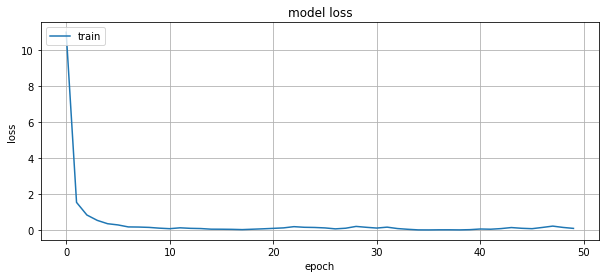

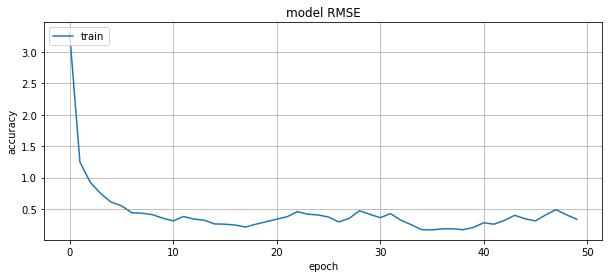

In [62]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

syntax to get prediction results using np.round

In [47]:
prediksi = model.predict(X_test[0:10])
print(prediksi)
hasil_test=(np.exp(prediksi))
hasil_test

1/1 [==============================] - 0s 22ms/step
[[12.321313]
 [11.802193]
 [11.447456]
 [12.346393]
 [11.804694]
 [11.797553]
 [11.980526]
 [11.940136]
 [12.710674]
 [11.597654]]


array([[224428.6  ],
       [133544.84 ],
       [ 93662.8  ],
       [230128.39 ],
       [133879.33 ],
       [132926.69 ],
       [159615.95 ],
       [153297.53 ],
       [331265.1  ],
       [108842.195]], dtype=float32)

In [48]:
print(y_test[0:10])
hasil_asli = (np.exp(y_test))
hasil_asli

764     12.375820
887     12.094588
890     11.849405
1293    11.849405
259     12.096263
1312    11.875838
899     11.982279
752     12.319406
1286    12.552930
707     11.580593
Name: SalePrice, dtype: float64


764     237001.0
887     178901.0
890     140001.0
1293    140001.0
259     179201.0
          ...   
109     163991.0
575     135001.0
535     369901.0
543     140001.0
846     238001.0
Name: SalePrice, Length: 268, dtype: float64

The following is the confusion matrix of the model

In [24]:
df_test = pd.read_csv("/content/drive/MyDrive/Kaggle/Competition House Prices/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [25]:
df_test = df_test.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [26]:
df_test[df_test.select_dtypes(['object']).columns]= df_test[df_test.select_dtypes(['object']).columns].apply(lambda x: pandas.factorize(x)[0])

In [27]:
df_test = df_test.drop('Id', axis=1).reset_index(drop=True)

In [28]:
num_cols=df_test.describe().columns.tolist()
imp = KNNImputer(n_neighbors=10, weights="uniform")
df_test=pd.DataFrame(imp.fit_transform(df_test), columns=df_test.columns)
df_test[num_cols]=np.log(df_test[num_cols]+1)

In [29]:
df_test = df_test[np.isfinite(df_test).all(1)]

In [30]:
tf = StandardScaler().fit_transform(df_test)
scaledf_test = pd.DataFrame(tf, columns=df_test.columns)

In [31]:
pred = model.predict(scaledf_test)
pred

42/42 [==============================] - 0s 3ms/step


array([[15.82355  ],
       [12.6279955],
       [10.57315  ],
       ...,
       [11.864604 ],
       [12.302094 ],
       [12.386834 ]], dtype=float32)

In [36]:
hasil=(np.exp(pred.reshape(-1))-1)
print(hasil[0:10])

[7448700.     304977.2     39070.543   48572.41    64279.25    30223.848
   55754.477   50361.043   77177.17    95593.24 ]


In [35]:
scale = StandardScaler()
scaler.fit(np.log(df_train[['SalePrice']]+1))
pred=tf.inverse_transform(pred)
pred

42/42 [==============================] - 0s 6ms/step


AttributeError: ignored

In [82]:
scaler = StandardScaler()
scaler.fit(np.log(df_train[['SalePrice']]+1))

pred=scaler.inverse_transform(prediksi)

In [84]:
pred=model.predict(df_test)
print(pred)
pred=scaler.inverse_transform(pred)
pred

42/42 [==============================] - 0s 7ms/step
[[26.541903]
 [26.270882]
 [26.865713]
 ...
 [24.509209]
 [26.284279]
 [26.735697]]


array([[3.3132014],
       [3.3056061],
       [3.322276 ],
       ...,
       [3.2562356],
       [3.3059816],
       [3.3186326]], dtype=float32)